In [1]:
import pandas as pd
import numpy as np
from numpy import newaxis
import random
import itertools
import os
import math
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.collections
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from tqdm import *

import keras
from keras.applications import *
import lightgbm as lgbm
from scipy import stats
from keras.models import Sequential, Model
from keras.layers import * #Dense, Dropout, Activation, Flatten, Input,Concatenate, concatenate
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
# from keras.layers import Concatenate, Dense, LSTM, Input, concatenate
from importlib import reload
# reload(astrohack)
# from astrohack import getAstrohackDataFrame2

Using TensorFlow backend.


In [2]:
from astrohack import *
import astrohack

In [3]:
plt.ion()
plt.show()

In [4]:
x = 128+16+4
if x & 16:
    print("a")

a


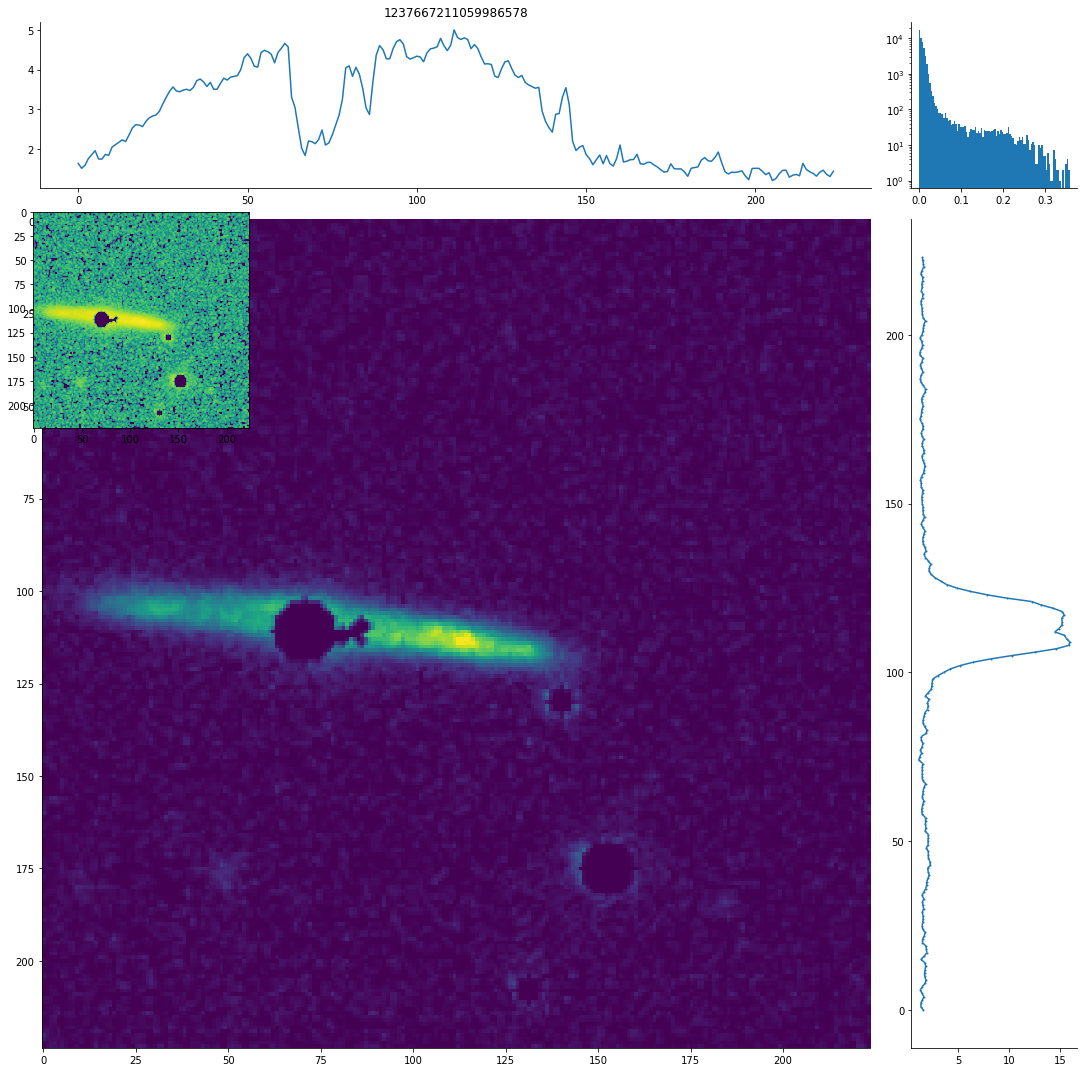

In [5]:
astrohack.dataFolder = 'data/mainData/'
astrohack.dataFolder = 'data/mainData_original/'

X = read_image('1237667211059986578')
X = cleanupImage(X)
X = img_preprocnoread(X, 1) 
X = img_preproc('1237667211059986578',32)
# plt.imshow(img_preproc('1237667211059986578', 16+32+64))
# plt.show()
# 1 for vlip
# 2 for hflip
# 4 for rotate90
# 8 for scale[0,1]
# 16 for log1p
# 32  for normalize ([-mean/std])
# 64 for crop
# 128 hackaton cleanup

drawOneGalaxy(1237667211059986578,128+16+4+2)

# score = xi2(truth, pred, error)



### Read metadata file

In [6]:
df = getAstrohackDataFrame()

df.head()

,SDSS_ID,RA,DEC,D25,redshift,logMstar,err_logMstar,GalSize_kpc,D_Mpc,d_pix_kpc,...,F-crop.imgsize,F-clean.flux.sum,F-clean.flux.min,F-clean.flux.max,F-clean.flux.mean,F-clean.flux.std,F-clean.centerflux,F-cleanaroundCenter.flux,F-clean.imgsize,ML_g_abs_err
0,1237662301367173202,231.31860,41.34601,0.512861,0.0761,10.325,0.045,48.655727,326.142854,0.632474,...,224.0,335.738342,0.0,0.311663,0.006691,0.017449,0.295520,0.291456,224.0,0.264471
1,1237662301905813735,236.00985,39.28830,0.446684,0.0685,9.824,0.040,38.145197,293.571417,0.569310,...,224.0,395.414642,0.0,0.332071,0.007881,0.018507,0.262002,0.266867,224.0,0.080147
2,1237662534360301834,237.49500,9.27861,0.630957,0.0390,9.923,0.053,30.677076,167.142861,0.324133,...,224.0,647.506958,0.0,0.741703,0.012905,0.036231,0.718606,0.676279,224.0,0.086683
3,1237662500543987740,242.00880,36.05398,0.562341,0.0658,10.356,0.079,46.129129,282.000016,0.546870,...,224.0,1033.956177,0.0,0.408230,0.020607,0.032396,0.408230,0.365300,224.0,0.229527
4,1237662474232398001,246.28905,29.94774,0.446684,0.0455,9.234,0.094,25.337321,194.999996,0.378155,...,224.0,468.694305,0.0,0.332187,0.009341,0.024021,0.294655,0.301434,224.0,0.093069


In [7]:
df[df.SDSS_ID == 1237654948376608866]

,SDSS_ID,RA,DEC,D25,redshift,logMstar,err_logMstar,GalSize_kpc,D_Mpc,d_pix_kpc,...,F-crop.imgsize,F-clean.flux.sum,F-clean.flux.min,F-clean.flux.max,F-clean.flux.mean,F-clean.flux.std,F-clean.centerflux,F-cleanaroundCenter.flux,F-clean.imgsize,ML_g_abs_err
2669,1237654948376608866,238.2861,54.14726,0.60256,0.0467,10.744,0.018,35.080534,200.14286,0.388128,...,224.0,1740.244141,0.0,4.675112,0.034683,0.122663,4.675112,3.196311,224.0,1.577


In [8]:
df['InverseSquareDistance'] = 1 / (df['Distance'] **2)

In [9]:
df.head()

,SDSS_ID,RA,DEC,D25,redshift,logMstar,err_logMstar,GalSize_kpc,D_Mpc,d_pix_kpc,...,F-crop.imgsize,F-clean.flux.sum,F-clean.flux.min,F-clean.flux.max,F-clean.flux.mean,F-clean.flux.std,F-clean.centerflux,F-cleanaroundCenter.flux,F-clean.imgsize,ML_g_abs_err
0,1237662301367173202,231.31860,41.34601,0.512861,0.0761,10.325,0.045,48.655727,326.142854,0.632474,...,224.0,335.738342,0.0,0.311663,0.006691,0.017449,0.295520,0.291456,224.0,0.264471
1,1237662301905813735,236.00985,39.28830,0.446684,0.0685,9.824,0.040,38.145197,293.571417,0.569310,...,224.0,395.414642,0.0,0.332071,0.007881,0.018507,0.262002,0.266867,224.0,0.080147
2,1237662534360301834,237.49500,9.27861,0.630957,0.0390,9.923,0.053,30.677076,167.142861,0.324133,...,224.0,647.506958,0.0,0.741703,0.012905,0.036231,0.718606,0.676279,224.0,0.086683
3,1237662500543987740,242.00880,36.05398,0.562341,0.0658,10.356,0.079,46.129129,282.000016,0.546870,...,224.0,1033.956177,0.0,0.408230,0.020607,0.032396,0.408230,0.365300,224.0,0.229527
4,1237662474232398001,246.28905,29.94774,0.446684,0.0455,9.234,0.094,25.337321,194.999996,0.378155,...,224.0,468.694305,0.0,0.332187,0.009341,0.024021,0.294655,0.301434,224.0,0.093069


In [10]:
df.columns

Index(['SDSS_ID', 'RA', 'DEC', 'D25', 'redshift', 'logMstar', 'err_logMstar',
       'GalSize_kpc', 'D_Mpc', 'd_pix_kpc', 'ML_g', 'ML_i', 'ML_g_rel_err',
       'ML_i_rel_err', 'RA_leda', 'DEC_leda', 'D25_leda', 'R25_leda',
       'pa_leda', 'petroMag_g', 'petroMagErr_g', 'petroMag_i', 'petroMagErr_i',
       'ML_g_zibetti', 'hasimg', 'isgalaxy', 'redshi', 'Distance', 'lin_mass',
       'lin_err', 'hasFile', 'InverseSquareDistance', 'F-raw.flux.sum',
       'F-raw.flux.min', 'F-raw.flux.max', 'F-raw.flux.mean', 'F-raw.flux.std',
       'F-raw.centerflux', 'F-rawaroundCenter.flux', 'F-raw.imgsize',
       'F-crop.flux.sum', 'F-crop.flux.min', 'F-crop.flux.max',
       'F-crop.flux.mean', 'F-crop.flux.std', 'F-crop.centerflux',
       'F-croparoundCenter.flux', 'F-crop.imgsize', 'F-clean.flux.sum',
       'F-clean.flux.min', 'F-clean.flux.max', 'F-clean.flux.mean',
       'F-clean.flux.std', 'F-clean.centerflux', 'F-cleanaroundCenter.flux',
       'F-clean.imgsize', 'ML_g_abs_err'],
    

In [11]:
xx = getAstrohackDataFrameOld()


/opt/anaconda3/envs/astrohack/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2802: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


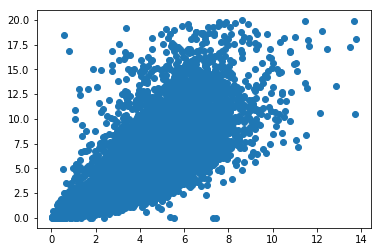

In [12]:
plt.scatter(x=df[df.ML_g_zibetti < 20]['ML_g'].values, y=df[df.ML_g_zibetti < 20]['ML_g_zibetti'].values)

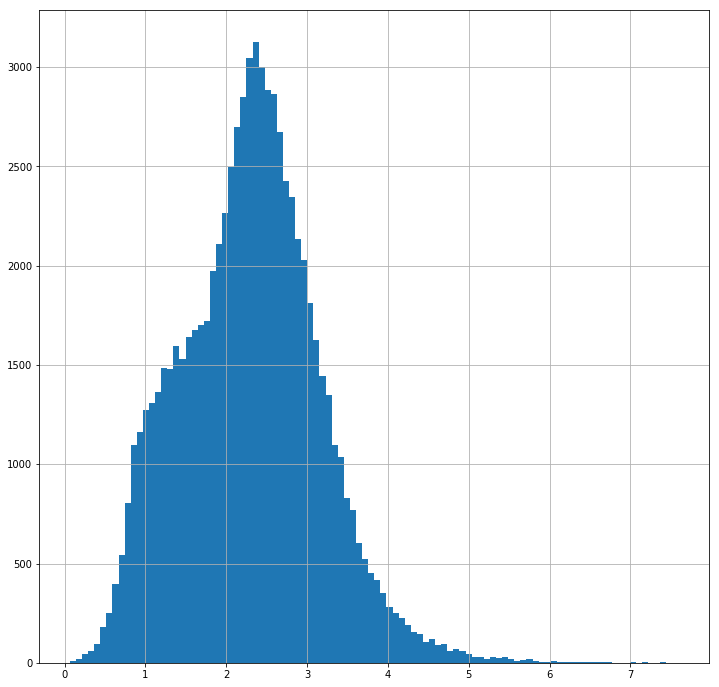

In [44]:
plt.figure(figsize=(12,12))
df[df.ML_i < 8].ML_i.hist(bins=100)

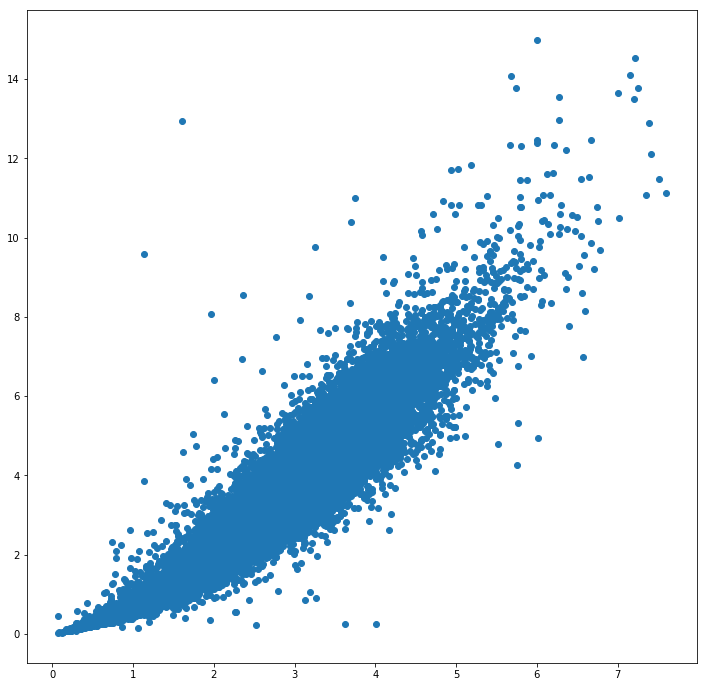

In [46]:
plt.figure(figsize=(12,12))
plt.scatter(x=df[df.ML_i < 8].ML_i.values, y=df[df.ML_i < 8].ML_g.values)

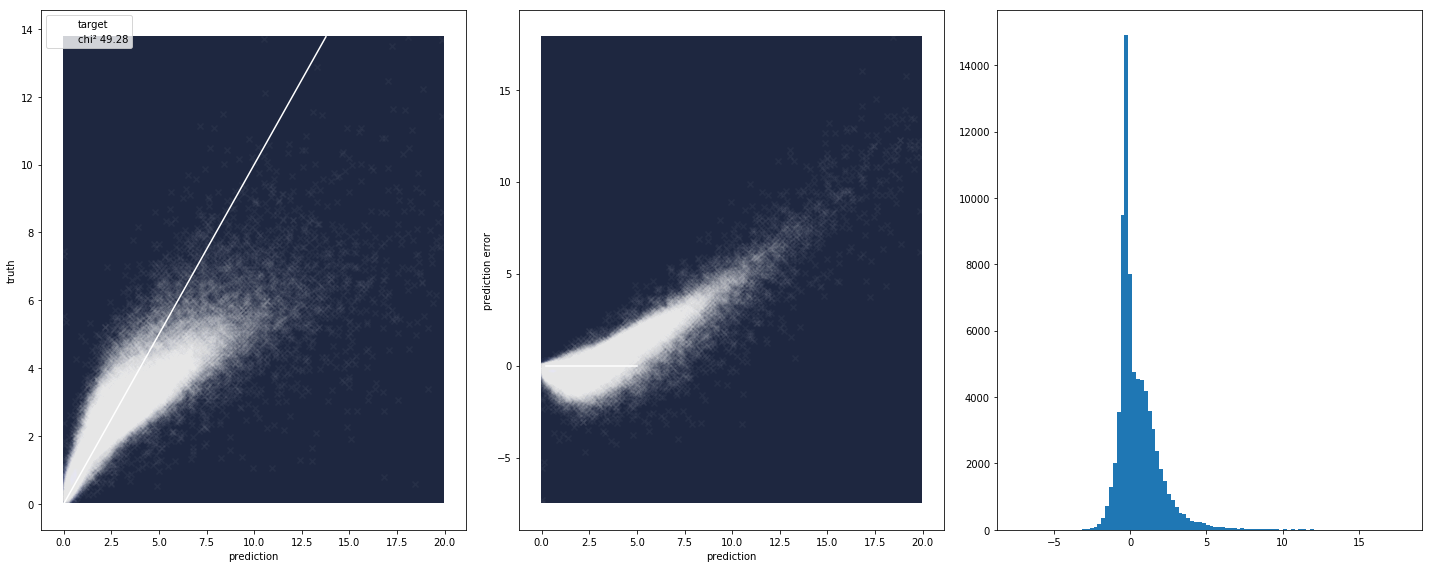

In [13]:
xi2andPlot(df[df.ML_g_zibetti < 20]['ML_g_zibetti'].values,df[df.ML_g_zibetti < 20]['ML_g'].values,df[df.ML_g_zibetti < 20]['ML_g_abs_err'].values)

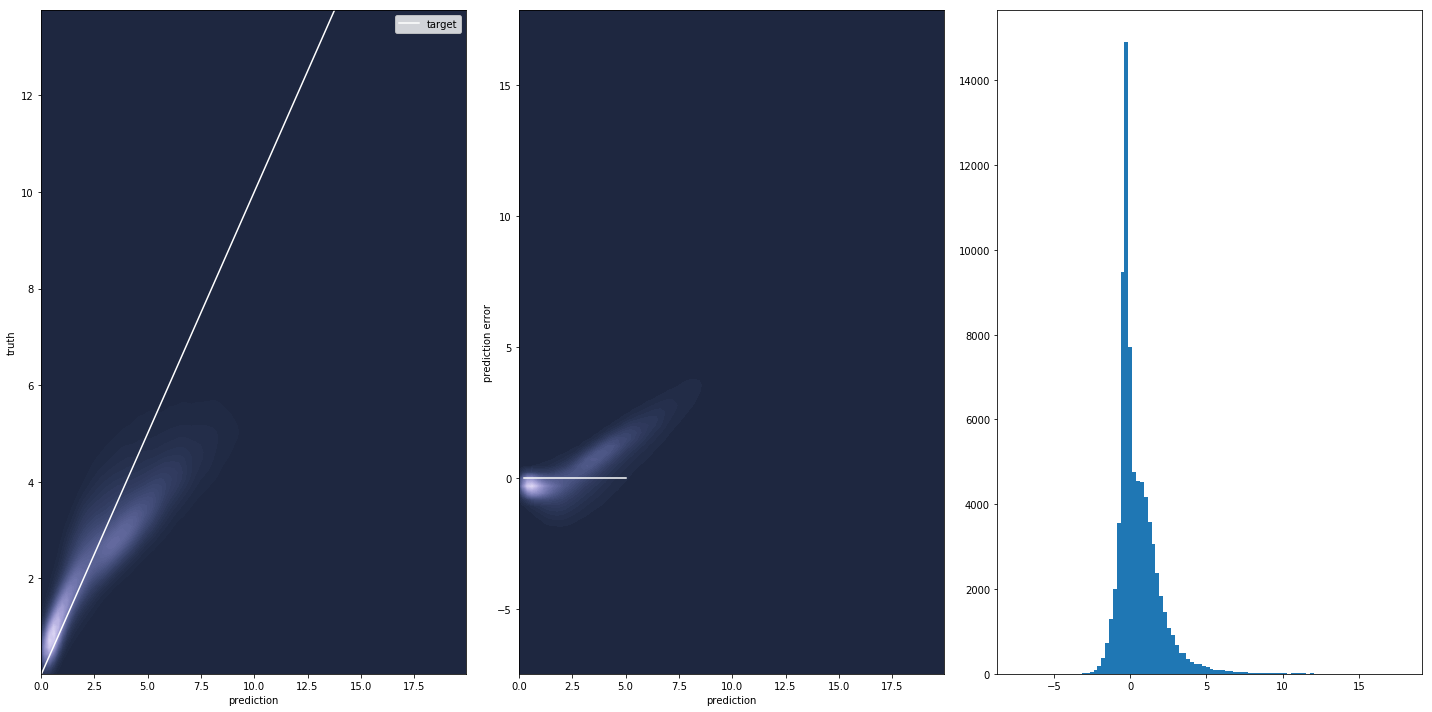

In [19]:
def xi22(pred,truth, error):

    resultXi2 = xi2(pred,truth, error)

    # cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
    cmap = sns.cubehelix_palette(as_cmap=True, start=2.8, rot=.1, reverse=True)
    plt.figure(figsize=(20,10))
    plt.subplot(131)
    sns.kdeplot(pred, truth, alpha=1, cmap=cmap, shade=True, bw=0.2, cut=0, n_levels=60, label='chi² {:.2f}'.format(resultXi2) )
#     plt.scatter(x=pred, y=truth, alpha=0.04, c='w', marker='x', label='chi² {:.2f}'.format(resultXi2) )
    plt.plot([min(truth),max(truth)],[min(truth),max(truth)], c='w', label='target')
    plt.xlabel('prediction')
    plt.ylabel('truth')
    plt.legend()
    plt.subplot(132)
    sns.kdeplot(pred, pred-truth, alpha=1, cmap=cmap, shade=True, bw=0.2, cut=0, n_levels=60, label='LGB chi² {:.2f}'.format(resultXi2) )
#     plt.scatter(x=pred, y=pred-truth, alpha=0.04, c='w', marker='x', label='LGB chi² {:.2f}'.format(resultXi2) )
    plt.plot([0.25,5],[0,0], c='w', label='target')
    plt.xlabel('prediction')
    plt.ylabel('prediction error')
    plt.subplot(133)
    plt.hist(pred-truth, bins=100)
    plt.tight_layout()
    plt.show()
    
xi22(df[df.ML_g_zibetti < 20]['ML_g_zibetti'].values,df[df.ML_g_zibetti < 20]['ML_g'].values,df[df.ML_g_zibetti < 20]['ML_g_abs_err'].values)

In [24]:
df.head()

,SDSS_ID,RA,DEC,D25,redshift,logMstar,err_logMstar,GalSize_kpc,D_Mpc,d_pix_kpc,...,F-crop.imgsize,F-clean.flux.sum,F-clean.flux.min,F-clean.flux.max,F-clean.flux.mean,F-clean.flux.std,F-clean.centerflux,F-cleanaroundCenter.flux,F-clean.imgsize,ML_g_abs_err
0,1237662301367173202,231.31860,41.34601,0.512861,0.0761,10.325,0.045,48.655727,326.142854,0.632474,...,224.0,335.738342,0.0,0.311663,0.006691,0.017449,0.295520,0.291456,224.0,0.264471
1,1237662301905813735,236.00985,39.28830,0.446684,0.0685,9.824,0.040,38.145197,293.571417,0.569310,...,224.0,395.414642,0.0,0.332071,0.007881,0.018507,0.262002,0.266867,224.0,0.080147
2,1237662534360301834,237.49500,9.27861,0.630957,0.0390,9.923,0.053,30.677076,167.142861,0.324133,...,224.0,647.506958,0.0,0.741703,0.012905,0.036231,0.718606,0.676279,224.0,0.086683
3,1237662500543987740,242.00880,36.05398,0.562341,0.0658,10.356,0.079,46.129129,282.000016,0.546870,...,224.0,1033.956177,0.0,0.408230,0.020607,0.032396,0.408230,0.365300,224.0,0.229527
4,1237662474232398001,246.28905,29.94774,0.446684,0.0455,9.234,0.094,25.337321,194.999996,0.378155,...,224.0,468.694305,0.0,0.332187,0.009341,0.024021,0.294655,0.301434,224.0,0.093069


In [21]:
FColumns = [x for x in df.columns if x[:2] == 'F-']

In [28]:
df[FColumns].as_matrix().shape

(76908, 24)

In [31]:
lgbm_params = {
    'boosting_type': 'gbdt',
    'objective': 'regression_l2',
    'nthread': 4,
    #'silent': True,
    'num_leaves': 2**4,
    'learning_rate': 0.01,
    'max_depth': 10,
    'max_bin': 255,
    #'subsample_for_bin': 50000,
    #'subsample': 0.8,
    #'subsample_freq': 1,
    #'colsample_bytree': 0.8,
    #'reg_alpha': 1,
    #'reg_lambda': 0,
    #'min_split_gain': 0.5,
    #'min_child_weight': 1,
    #'min_child_samples': 60,
    #'scale_pos_weight': 1,
    'device' : 'gpu',
    'metric' : 'rmse',
    #'metric' : 'multi_error',
    'verbose':0,
}

trainSet = df[FColumns].as_matrix()
YSet = df['ML_g'].as_matrix()
errSet = df['ML_g_abs_err'].as_matrix()
maxBoostRuns = 30000


tix, vix = list(range(0,int(len(trainSet)*0.9))), list(range(int(len(trainSet)*0.9),len(trainSet)))

X_train, X_test = trainSet[tix], trainSet[vix]
Y_train, Y_test = YSet[tix], YSet[vix]

lgb_train = lgbm.Dataset(X_train, Y_train)
lgb_eval = lgbm.Dataset(X_test, Y_test)

lgb_train.set_weight(1/errSet[tix]**2)
lgb_eval.set_weight(1/errSet[vix]**2)

gbm = lgbm.train(lgbm_params,
                   lgb_train,
                   num_boost_round=maxBoostRuns,
                   valid_sets=[lgb_train,lgb_eval],  # eval training data
                   verbose_eval=100,
                   early_stopping_rounds=100,
                    feval = lgb_chi2
                )

Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 0.97103	training's Chi²: 97.1	valid_1's rmse: 1.18688	valid_1's Chi²: 119.2
[200]	training's rmse: 0.799842	training's Chi²: 65.9	valid_1's rmse: 1.05212	valid_1's Chi²: 93.7
[300]	training's rmse: 0.756372	training's Chi²: 58.9	valid_1's rmse: 1.00278	valid_1's Chi²: 85.1
[400]	training's rmse: 0.738995	training's Chi²: 56.2	valid_1's rmse: 0.982773	valid_1's Chi²: 81.7
[500]	training's rmse: 0.72855	training's Chi²: 54.7	valid_1's rmse: 0.973105	valid_1's Chi²: 80.1
[600]	training's rmse: 0.720438	training's Chi²: 53.5	valid_1's rmse: 0.966129	valid_1's Chi²: 79
[700]	training's rmse: 0.713712	training's Chi²: 52.5	valid_1's rmse: 0.959128	valid_1's Chi²: 77.8
[800]	training's rmse: 0.707773	training's Chi²: 51.6	valid_1's rmse: 0.953779	valid_1's Chi²: 77
[900]	training's rmse: 0.702512	training's Chi²: 50.8	valid_1's rmse: 0.949573	valid_1's Chi²: 76.3
[1000]	training's rmse: 0.697946	training's C

In [ ]:
# remove this for entire dataset
# training_idx = training_idx[:100]
# test_idx = test_idx[:50]

In [ ]:
# y_train = df.iloc[training_idx]['ML_g']
# y_test = df.iloc[test_idx]['ML_g']
# print(y_train.shape)
# print(y_test.shape)

In [ ]:
def normalizeVector(v, minVal, maxVal):
    return (v-minVal)/(maxVal-minVal)
v_normalize = np.vectorize(normalizeVector, otypes=[np.float])

In [ ]:
ids = list(range(0,10))
imgs = [read_image(i) for i in  df.iloc[ids]['SDSS_ID'].values]


In [ ]:

# 1 for vlip
# 2 for hflip
# 4 for rotate90
# 8 for scale[0,1]
# 16 for log1p
# 32  for normalize ([-mean/std])
# 64 for crop
# 128 hackaton cleanup

curPreproc = 8+16+64

input_features = ['Distance', 'InverseSquareDistance']

def getDataForIDs(ids):
#     print(list(ids))
    imgs = [read_image(i) for i in  df.iloc[ids]['SDSS_ID'].values]
    features = np.zeros([len(ids),6])
    features[:,:2] = (df.iloc[ids][input_features]).as_matrix()
    features[:,2:] = [[i.sum(), i.mean(), i.std(), i.shape[0]] for i in imgs]

    data = [img_preprocnoread(i,curPreproc) for i in  imgs]
    data = np.stack(data)[:,:,:,newaxis]
    
    return [data, features]


def getInputImages(ids):
    imgs = [read_image(i) for i in  df.iloc[ids]['SDSS_ID'].values]
    
    data = [img_preprocnoread(imgs,curPreproc) for i in  imgs]
#     data = [v_normalize(i, np.min(i), np.max(i)) for i in data]
    data = np.stack(data)
    data = data[:, :, :, newaxis]
    return data
    
def getInputFeatures(ids):
    return (df.iloc[ids][input_features]).as_matrix()

def getOutput(ids):
    return df.iloc[ids]['ML_g'].values
    

In [ ]:
# x_train = [img_preproc(i) for i in  df.iloc[training_idx]['SDSS_ID'].values]
# x_train = [v_normalize(i, np.min(i), np.max(i)) for i in x_train]
# x_train = np.stack(x_train)
# print(x_train.shape)

In [ ]:
# x_test = [img_preproc(i) for i in  df.iloc[test_idx]['SDSS_ID'].values]
# x_test = [v_normalize(i, np.min(i), np.max(i)) for i in x_test]
# x_test = np.stack(x_test)
# print(x_test.shape)


In [ ]:
# declare depth image of 1
# x_train = x_train.reshape(x_train.shape[0], 224, 224, 1)
# x_test = x_test.reshape(x_test.shape[0], 224, 224, 1)
# print(x_train.shape)
# print(x_test.shape)

In [ ]:
# input_features = ['Distance', 'InverseSquareDistance']
# x_train2 = df.iloc[training_idx][input_features]
# x_test2 = df.iloc[test_idx][input_features]
# print(x_train2.shape)
# print(x_test2.shape)

In [ ]:
# print(np.min(x_train))
# print(np.max(x_train))

In [ ]:
ii = Input(shape=(224,224,1))
 
x = Convolution2D(16, (3, 3), activation='relu', padding='same', input_shape=(224,224,1))(ii)
x = MaxPooling2D(pool_size=(2,2)) (x)
x = Convolution2D(32, (3, 3),  activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2,2)) (x)
x = Dropout(0.6)(x)

x = Convolution2D(32, (3, 3),  activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2,2)) (x)
x = Dropout(0.6)(x)

x = Convolution2D(32, (3, 3),  activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2,2)) (x)

x = Dropout(0.6)(x)
 
x = Flatten()(x)

iff = Input(shape=(6,))
c = concatenate([x, iff])
x = Dense(300, activation='relu')(c)
x = Dropout(0.6) (x)
x = Dense(100, activation='relu')(c)
x = Dropout(0.6) (x)
x = Dense(10, activation='relu')(c)
x = Dropout(0.6) (x)
x = Dense(1, activation='elu') (x)


model = Model([ii, iff], x)

model.compile(loss='mse',
              optimizer='nadam',
              metrics=['accuracy'])
model.summary()

In [ ]:
from IPython.display import clear_output

class PlotLosses(keras.callbacks.Callback):
    def __init__(self):
        self.initVars()
    
    def initVars(self):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = [] # self validation
        self.fig = plt.figure()
        self.logs = []
        self.lr = []
        
#     def on_train_begin(self, logs={}):

        
    def on_epoch_end(self, epoch, logs={}):
        
        self.i += 1
        
        if self.i% 1 != 0:
            return
        
        curloss = logs.get('loss')
        self.losses.append(curloss)
        self.val_losses.append(logs.get('val_loss'))
        self.logs.append(logs)
        self.x.append(self.i)
        
        clear_output(wait=True)
        plt.figure(figsize=(6,6))
        self.plotLosses(None)
        plt.show()

    def plotLosses(self, ax):
        plt.plot(self.x, self.losses, label="train loss")
        plt.plot(self.x, self.val_losses, label="val loss")

        plt.legend()
        
        
myPlot = PlotLosses()
myPlot.initVars()

In [ ]:
step = 10000
epochs = 200
batch_size = 3
myPlot.initVars()
redlr = keras.callbacks.ReduceLROnPlateau(factor=0.9, patience=20)

for i in range(0, len(training_idx), step):
    x_train = getDataForIDs(training_idx[i:(i + step)])
    y_train = getOutput(training_idx[i:(i + step)])
    error = (df.iloc[training_idx[i:(i + step)]]['ML_g_rel_err'].values) * (df.iloc[training_idx[i:(i + step)]]['ML_g'].values)

    model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, callbacks=[myPlot,redlr],
             sample_weight= 1/(error**2), validation_split = 0.1)
    
    

In [ ]:
pred = []
for i in range(0, len(test_idx), step):
    x_test= getDataForIDs(test_idx[i:(i + step)])
    p = model.predict(x_test)
    pred.extend( p[:,0])    

actual = getOutput(test_idx)
error = (df.iloc[test_idx]['ML_g_rel_err'].values) * (df.iloc[test_idx]['ML_g'].values)

print(len(actual))
actual[:10]
chi = np.mean((actual - pred) **2/ error**2)
chi

In [ ]:
chi

In [ ]:
chi

In [ ]:
np.where(myPlot.val_losses == np.min(myPlot.val_losses))
myPlot.losses[13779]

In [ ]:
# plt.figure(figsize=(18,18))
# plt.plot( myPlot.losses, label="train loss")
# plt.plot( myPlot.val_losses, label="val loss")
# plt.yscale('log')


KeyError: 'p_month'

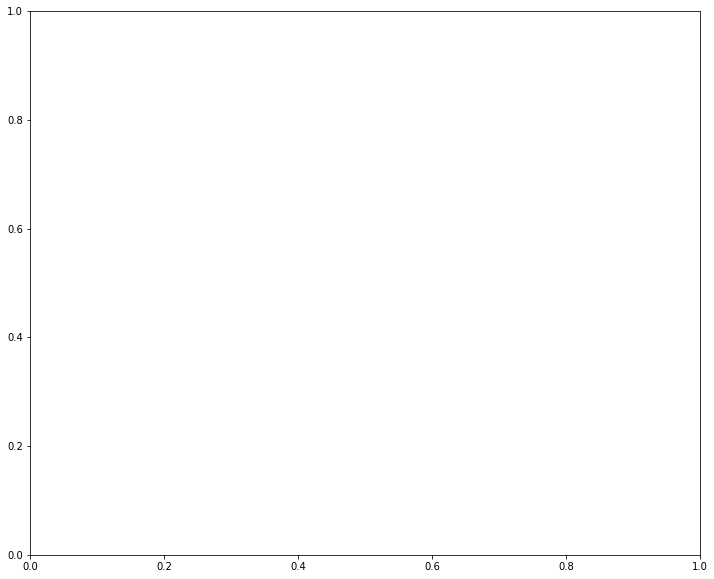

In [32]:

plt.figure(figsize=(12,10))
def plotTimeDistribution(data, index, values, numBins=9, cmap='jet', distAlpha=0.5):
    ax = plt.subplot(111)
   
    mii = min(data[index])
    maa = max(data[index])
 
    def perBin(x, numBins):
        return [np.percentile(x,curBin*(100/(numBins+1))) for curBin in range(1, numBins+1)]
 
    percentiles = data.pivot_table(index=index, values=values, aggfunc=[lambda x: perBin(x,numBins)]).iloc[:,0].values
    percentiles = np.stack(percentiles)
 
    print(percentiles.shape)
 
    cmap = get_cmap(cmap)
    distAlpha = 0.5
 
    halfBins = (numBins+1)//2
    for i in range(halfBins):
        # start with middle:
        mid = (numBins)//2+1
 
        rgba = cmap(1-1/(i+1))
 
        ax.fill_between(np.arange((maa-mii)+1)+mii, percentiles[:,i],percentiles[:,i+1], alpha=distAlpha, facecolor=rgba)
        ax.fill_between(np.arange((maa-mii)+1)+mii, percentiles[:,numBins-(i+1)],percentiles[:,numBins-(i+2)], alpha=distAlpha, facecolor=rgba)
 
    meansStd = data.groupby(index).agg(['median']).reset_index()
 
    plt.scatter(x=data[index].values, y=data[values].values, c='k', alpha=0.3)
 
    plt.plot(np.arange((maa-mii)+1)+mii,meansStd[('price', 'median')].values, c='r')
 
plotTimeDistribution(xx, 'p_month', 'price', cmap='jet')

In [33]:
%pastebin 32

'https://gist.github.com/6c0be2edf37be26192430db7aca7f857'